In [6]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [7]:
from mod_my_utils.read_write_data import *
from mod_backtest_utils.backtest_rsi import RSIStrategy
from mod_backtest_utils.portfolio import MarketOnPricePortfolio

In [8]:
symbols = ['AAPL', 'MSFT', 'ADBE', 'EBAY', 'AMD', 'IBM']
folder_path = 'data/'
index_col = 'Date'

period = 50
buy_threshold = 20
sell_threshold = 80

stock name:  AAPL


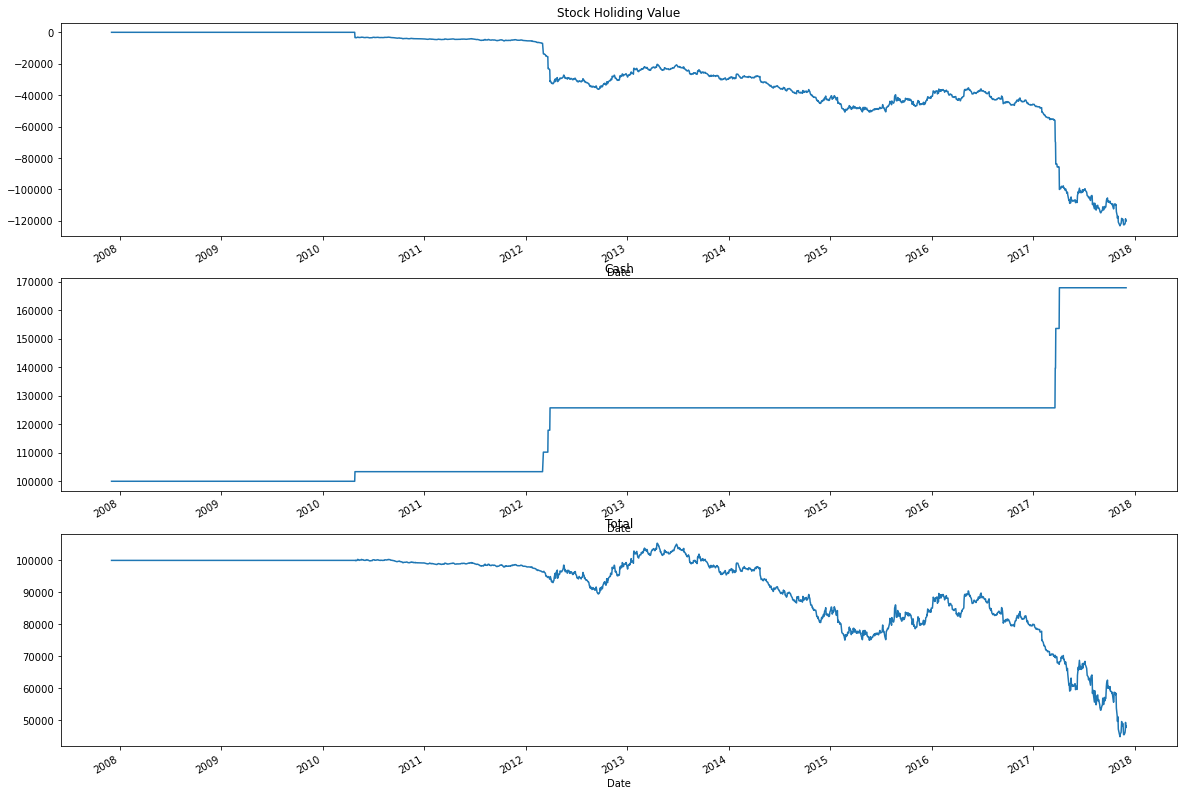

stock name:  MSFT


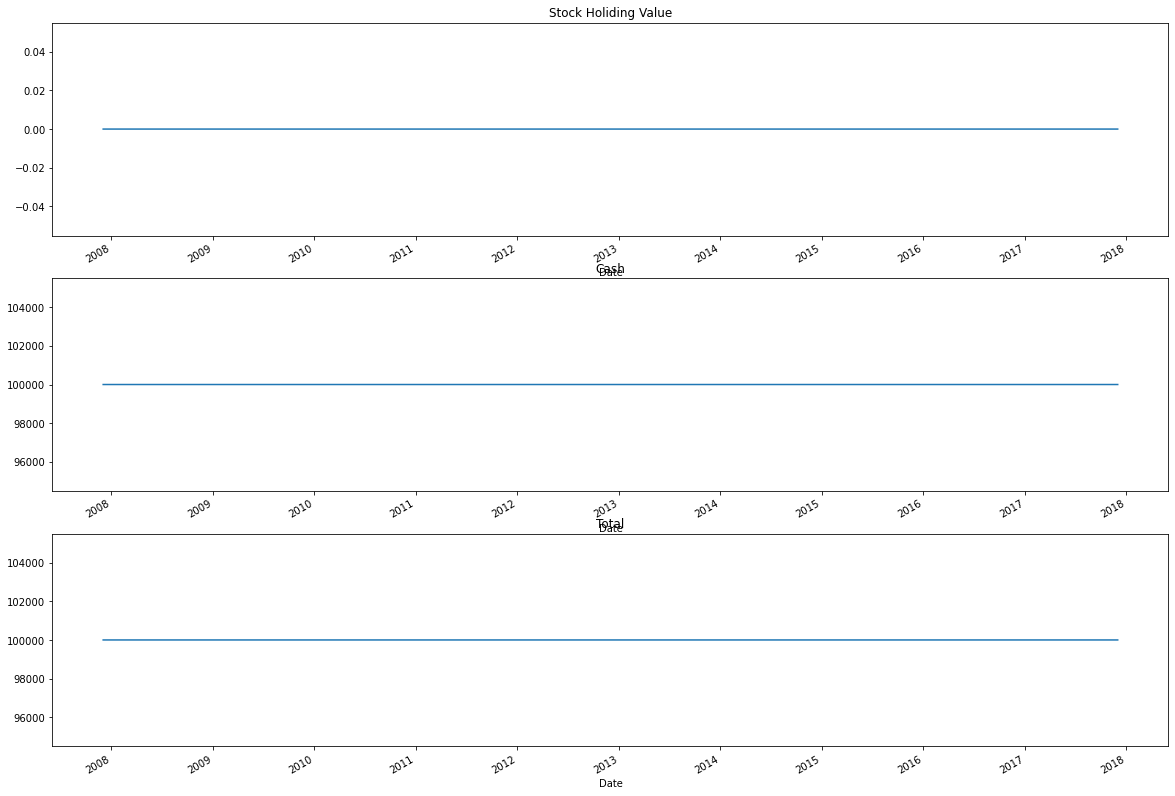

stock name:  ADBE


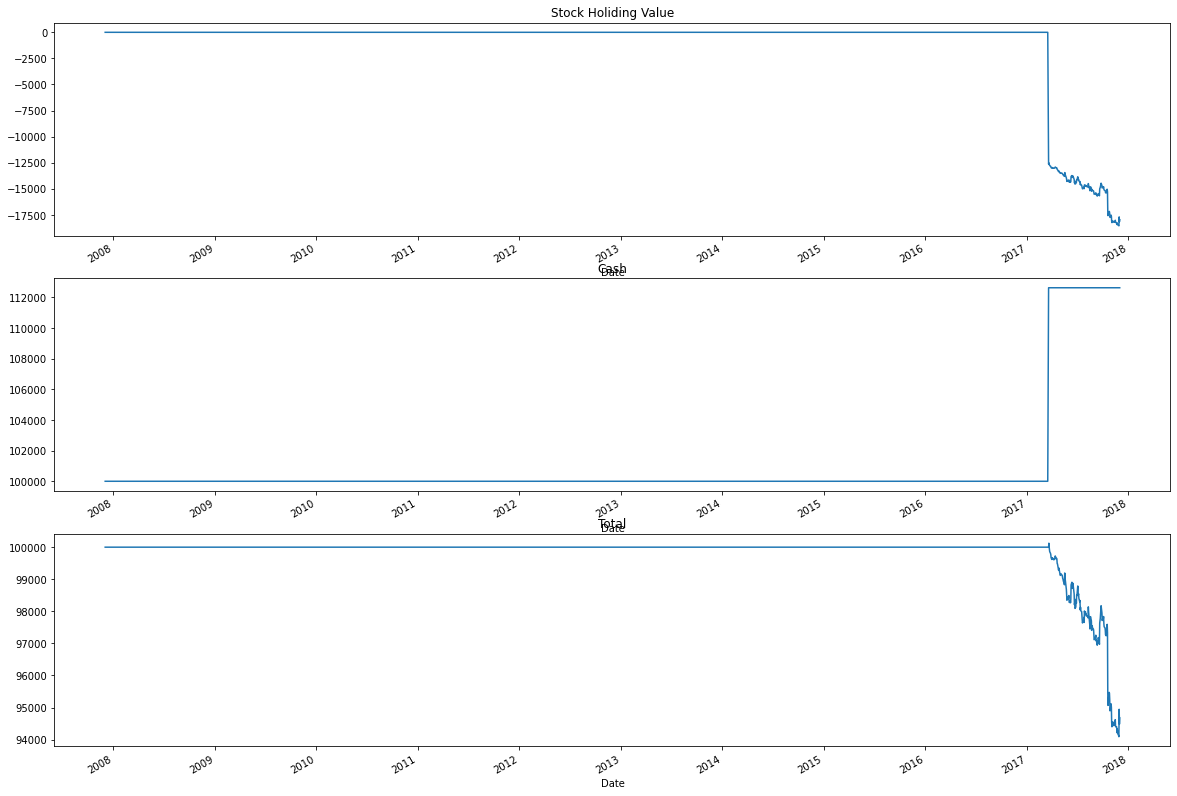

stock name:  EBAY


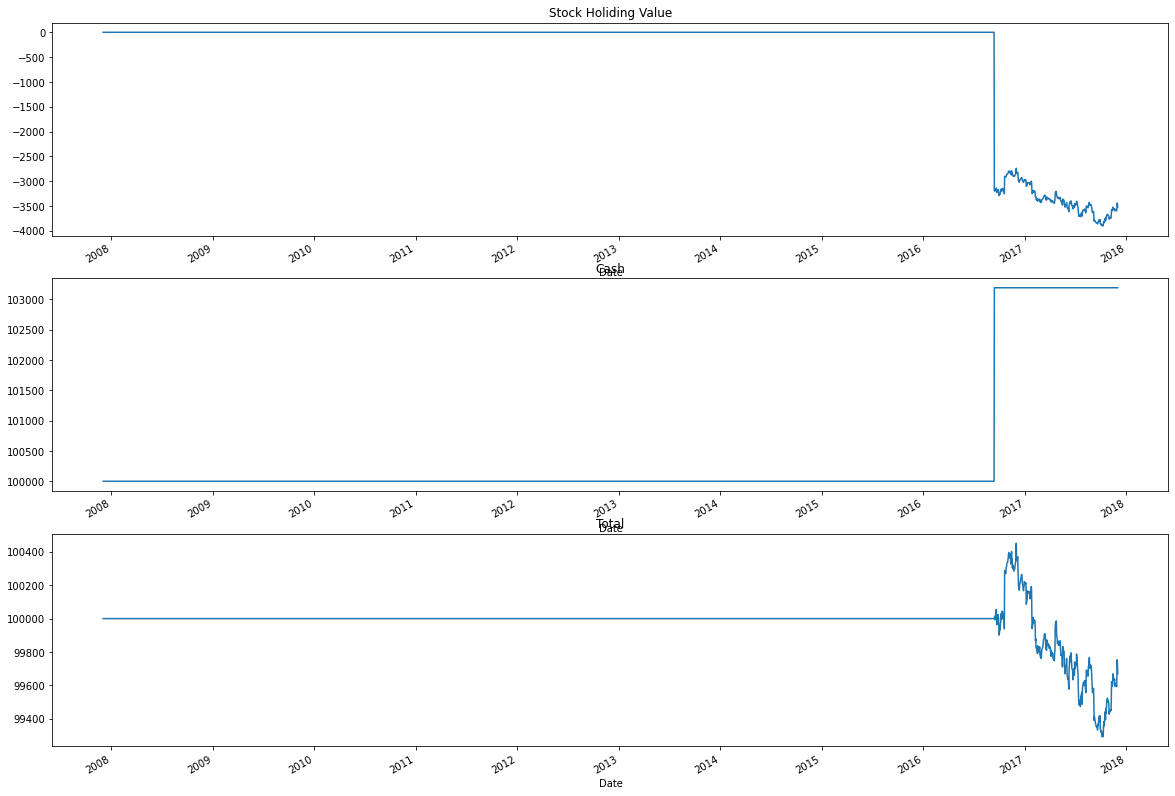

stock name:  AMD


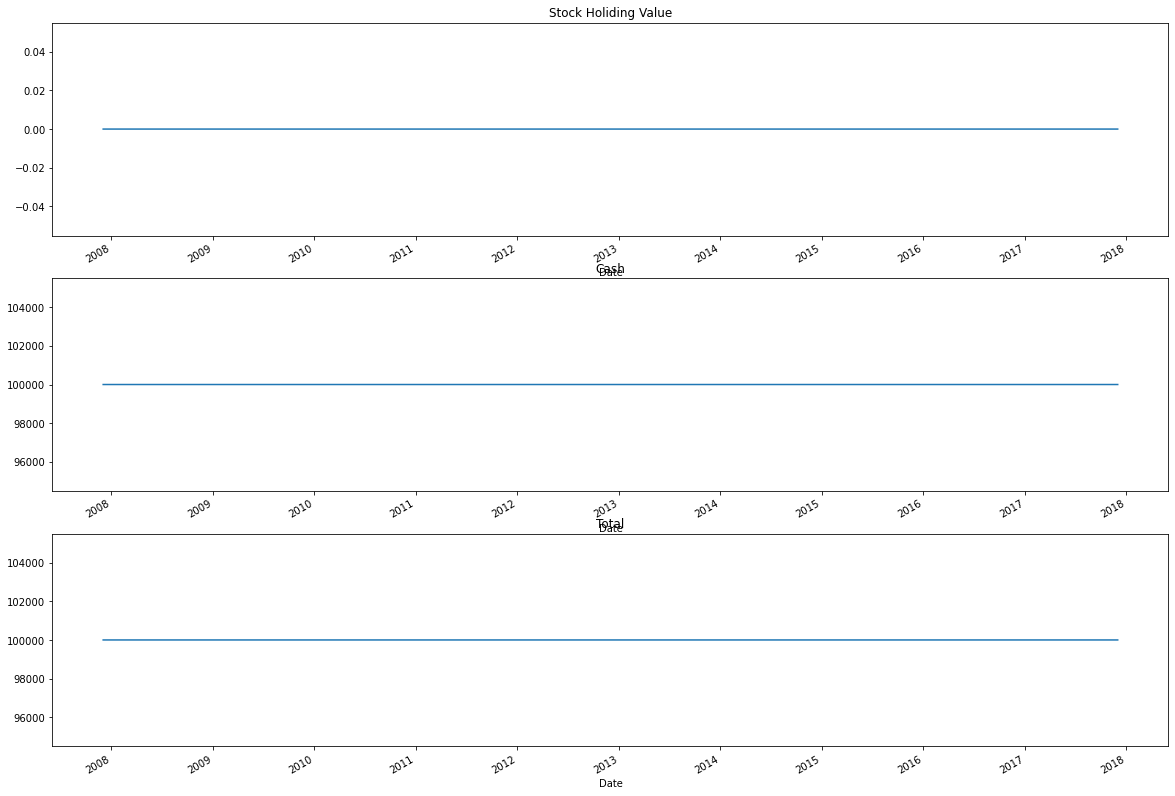

stock name:  IBM


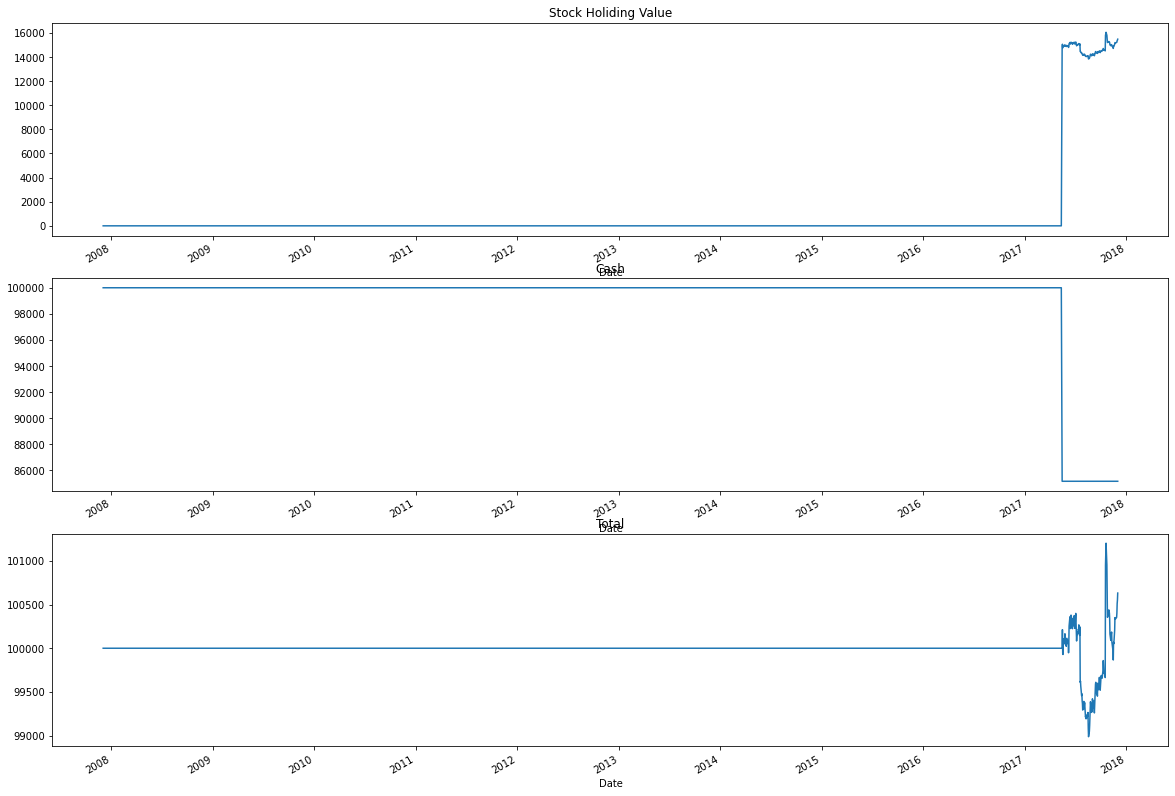

In [9]:
for stock_name in symbols:
    stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)
    data = stock_data[["Adj. Close"]].copy()
    data.columns = ["price"]
    data.head()
    rsi = RSIStrategy(stock_name, data, period=period, buy_threshold=buy_threshold, sell_threshold=sell_threshold)
    signals = rsi.generate_signals()
    portfolio = MarketOnPricePortfolio(stock_name, signals=signals)
    rsi_portfolio = portfolio.backtest_portfolio()
    portfolio.plot_stock_portfolio()